 <h1>Black Friday</h1>

<h2>Importation des packages necessaires</h2>

In [1]:
import pandas as pd #Pour la manipulation et l'analyse de données
import numpy as np #Pour les calculs mathématique
import seaborn as sns #Pour la visualisation statistique des données
import matplotlib.pyplot as plt #Tracer et visualiser les données sous forme de graphes

<h2>Chargement de données</h2>

In [2]:
data = pd.read_csv('BlackFriday.csv')

<h2>Un premier coup d'oeil sur le dataset</h2>

In [3]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


<h2>Description des données</h2>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


<p>describe () permettent d’afficher des informations statistiques de base telles que les pourcentages </p>

In [5]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,370591.000000,164278.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,9.842144,12.669840,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,5.087259,4.124341,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,9.000000,14.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,15.000000,16.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


<h2>Nettoyage et pretraitement de données</h2>

<h3>    Nettoyage des valeurs NAs</h3>

In [6]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Product_Category_3    69.441029
Product_Category_2    31.062713
dtype: float64 %


<p>on remarque que les NAs dans les <strong>Product_category_2 et Product_categorie_3</strong> veulent dire que notre client n'a pas acheté de produit dans ces deux categories.
    Donc on peut les remplir par des zeros sans problème.</p>

In [7]:
data = data.fillna(0)

<p> Si on execute à nouveau la commande d'avant, on verra qu'il n'y a plus de Nas dans notre dataset

In [8]:
missing_values = data.isnull().sum().sort_values(ascending = False)
missing_values = missing_values[missing_values > 0]/data.shape[0]
print(f'{missing_values *100} %')

Series([], dtype: float64) %


<h2>Transofmation de données</h2>

<h3> ** Conversion de Gender en binaire</h3>

In [9]:
gender_dict = {'F':0, 'M':1}
data["Gender"] = data["Gender"].apply(lambda line: gender_dict[line])

data["Gender"].value_counts()

1    405380
0    132197
Name: Gender, dtype: int64

<h3> ** Conversion de Age en valeurs numériques</h3>

In [11]:
age_dict = {'0-17':0, '18-25':1, '26-35':2, '36-45':3, '46-50':4, '51-55':5, '55+':6}
data["Age"] = data["Age"].apply(lambda line: age_dict[line])

data["Age"].value_counts()

2    214690
3    107499
1     97634
4     44526
5     37618
6     20903
0     14707
Name: Age, dtype: int64

<h3> ** Conversion de City_category en valeurs numériques</h3>

In [12]:
city_dict = {'A':0, 'B':1, 'C':2}
data["City_Category"] = data["City_Category"].apply(lambda line: city_dict[line])

data["City_Category"].value_counts()

1    226493
2    166446
0    144638
Name: City_Category, dtype: int64

<h3> ** Conversion de Stay_in_current_city en valeurs numériques</h3>

In [13]:
def map_stay(stay):
        if stay == '4+':
            return 4
        else:
            return int(stay)

data['Stay_In_Current_City_Years'] = data['Stay_In_Current_City_Years'].apply(map_stay)  

<p>on a converti les valeurs du stay in current city en valeur numerique
    <br><b>rester dans la ville actuelle<b> </p>

In [14]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,0,0,10,0,2,0,3,0.0,0.0,8370
1,1000001,P00248942,0,0,10,0,2,0,1,6.0,14.0,15200
2,1000001,P00087842,0,0,10,0,2,0,12,0.0,0.0,1422
3,1000001,P00085442,0,0,10,0,2,0,12,14.0,0.0,1057
4,1000002,P00285442,1,6,16,2,4,0,8,0.0,0.0,7969


<h2> Exploration de données</h2>
<h3>  Distribution de la variable cible : Purchase(Montant d'achat)</h3>

/Users/vpro/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, "Distribution de montant d'achat")

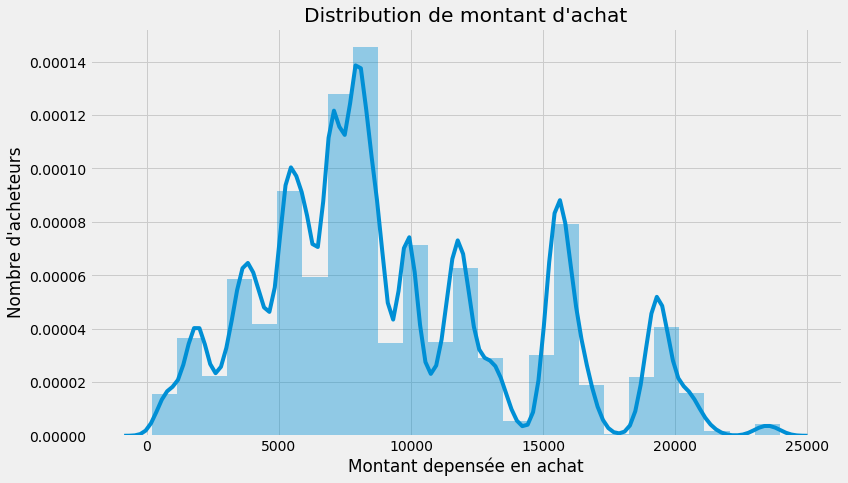

In [15]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(12,7))
sns.distplot(data.Purchase, bins = 25)
plt.xlabel("Montant depensée en achat")
plt.ylabel("Nombre d'acheteurs")
plt.title("Distribution de montant d'achat")

<h4> Analyse des variables prédictives</h4>

<h5>** Analyse de la variable Marital_Status</h5>

In [16]:
data.Marital_Status.value_counts()

0    317817
1    219760
Name: Marital_Status, dtype: int64

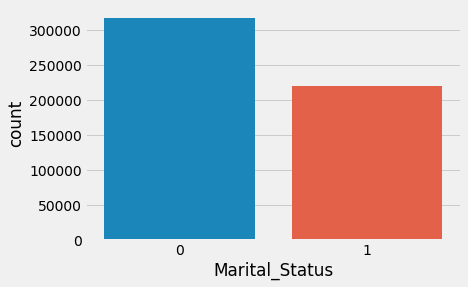

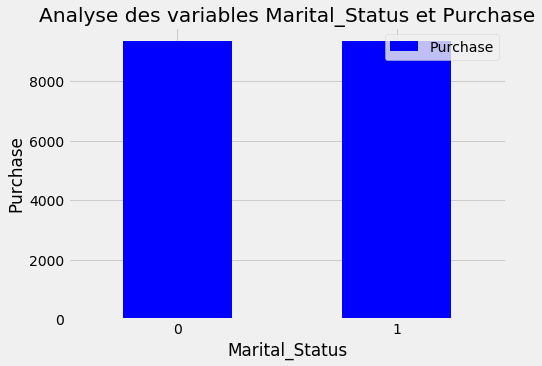

In [17]:

sns.countplot(data.Marital_Status)
Marital_Status_pivot = \
data.pivot_table(index='Marital_Status', values="Purchase", aggfunc=np.mean)

Marital_Status_pivot.plot(kind='bar', color='blue',figsize=(7,5))
plt.xlabel("Marital_Status")
plt.ylabel("Purchase")
plt.title("Analyse des variables Marital_Status et Purchase")
plt.xticks(rotation=0)
plt.show()

<p> Comme on voit au dessus, les clients célibataires sont beaucoup plus nombreux que les clients mariés. Par contre, si on regarde leur montant d'achat sur le deuxieme graphe on constatera qu'il est presque le même, ce qui veut dire que, en moyenne, les clients mariés depensent plus que les clients célibataires. </p>

<h5>** Analyse de l'age</h5>

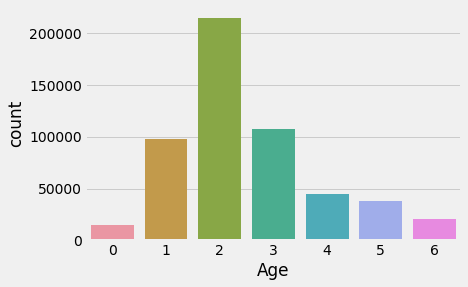

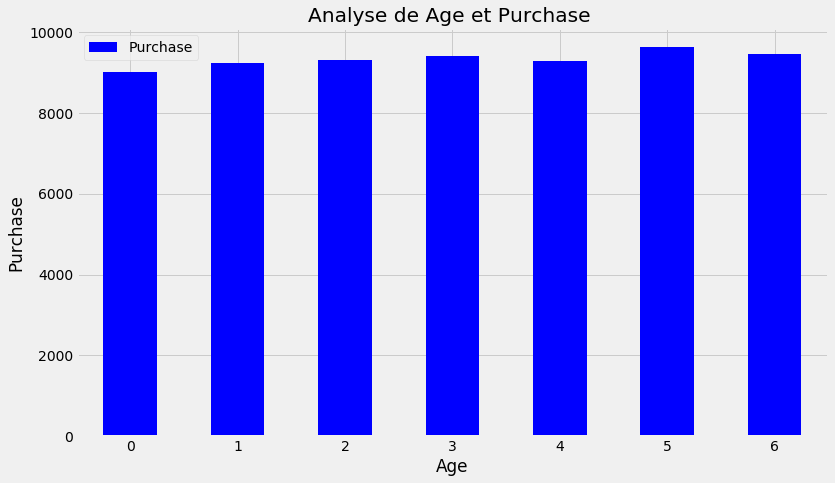

In [18]:
sns.countplot(data.Age)
Product_category_1_pivot = \
data.pivot_table(index='Age', values="Purchase", aggfunc=np.sum)

Product_category_1_pivot = \
data.pivot_table(index='Age', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Age")
plt.ylabel("Purchase")
plt.title("Analyse de Age et Purchase ")
plt.xticks(rotation=0)
plt.show()

<p>Comme dans la variable d'avant, on constate que les clients entre 25 et 35 ans font la majorité de la clientèle mais il n'y a pas une grosse difference entre leurs depenses et celles des autres categories d'age. Donc, en moyenne les autre clients depensent plus que ceux entre 25 et 35 ans</p>

<h5>1.1.3.3. Analyse de la variable City_Category</h5>

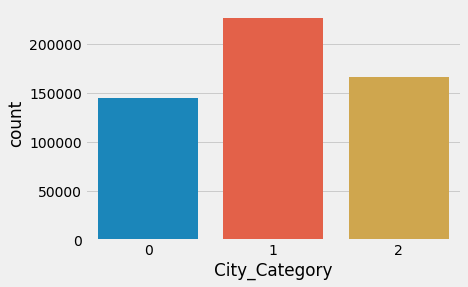

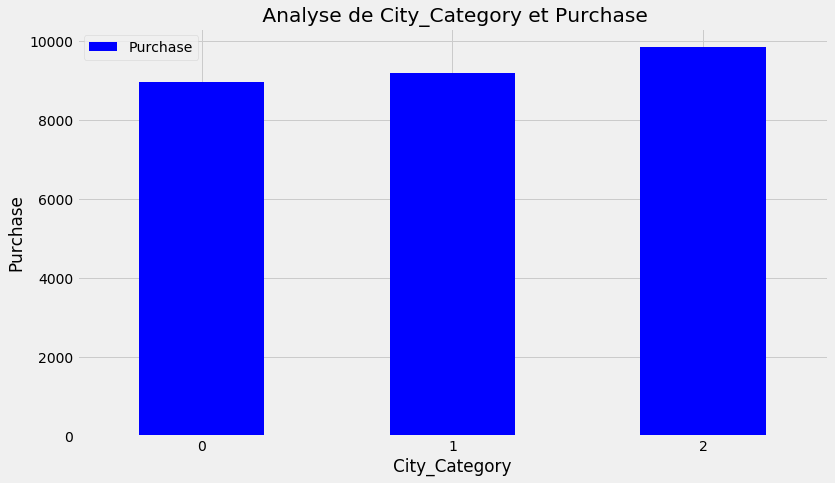

In [19]:
sns.countplot(data.City_Category)

Product_category_1_pivot = \
data.pivot_table(index='City_Category', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("City_Category")
plt.ylabel("Purchase")
plt.title(" Analyse de City_Category et Purchase")
plt.xticks(rotation=0)
plt.show()

<p>Ici on voit que «A» représente la plus grande ville alors que «C» est la plus petite et taille moyenne  c 'est «B» <br>Mais il n'y a pas une grosse difference entre leurs depenses et celles des autres Villes<br> Donc on remarque que les personnes qui habite dans B depense beaucoup plus que les personees habite dans A et C </p>

<h5>1.1.3.4. Distribution de la variable Stay_In_Current_City_Years</h5>

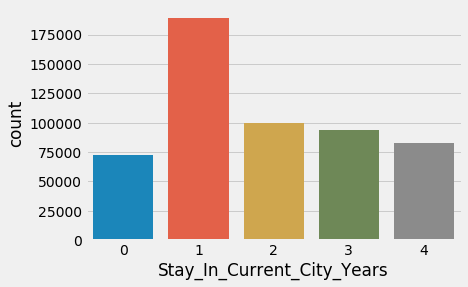

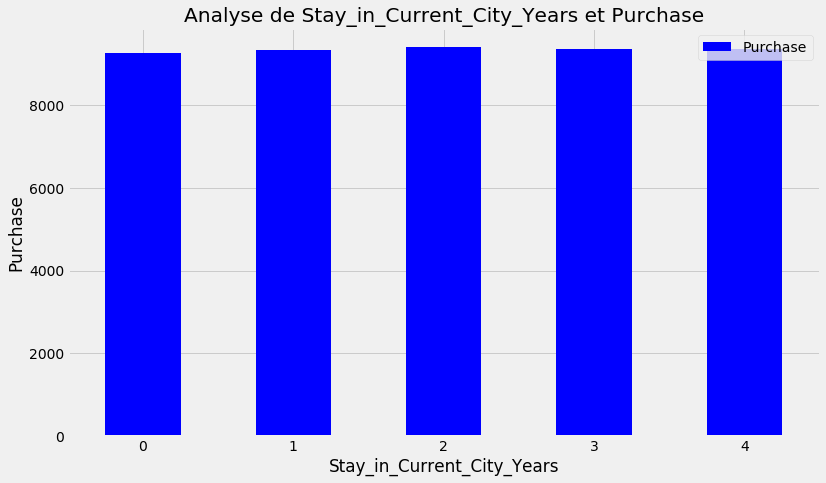

In [20]:
sns.countplot(data.Stay_In_Current_City_Years)

Product_category_1_pivot = \
data.pivot_table(index='Stay_In_Current_City_Years', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Stay_in_Current_City_Years")
plt.ylabel("Purchase")
plt.title("Analyse de Stay_in_Current_City_Years et Purchase")
plt.xticks(rotation=0)
plt.show()

<p>on remarque que  Les nouveaux arrivants en ville profitera des bas prix du Black Friday pour acheter tout ce dont il a besoin<br>Mais il n'y a pas une grosse difference entre leurs depenses et celles des aures personnes </p>

<h4>Analyse de la variable Gender</h4>


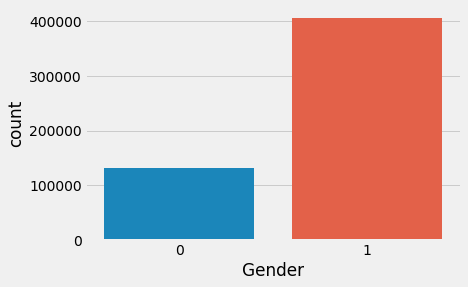

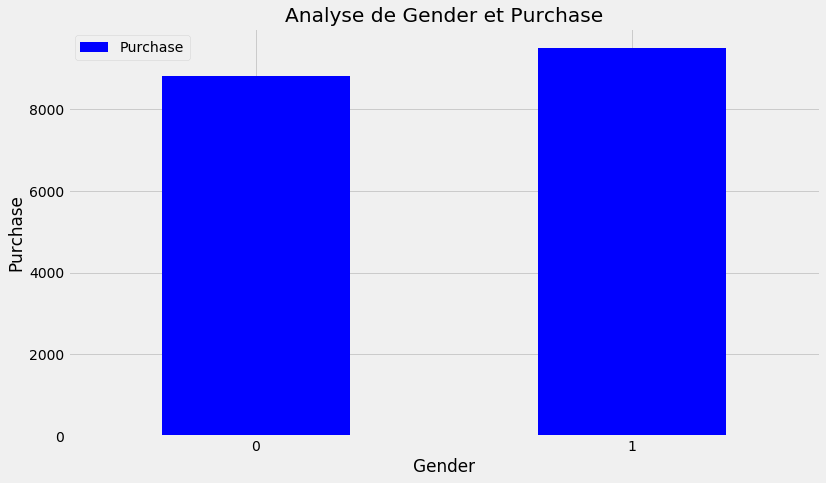

In [21]:
sns.countplot(data.Gender)

Product_category_1_pivot = \
data.pivot_table(index='Gender', values="Purchase", aggfunc=np.mean)

Product_category_1_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Gender")
plt.ylabel("Purchase")
plt.title("Analyse de Gender et Purchase")
plt.xticks(rotation=0)
plt.show()

<p>on voit ici que le nombre des hommes sont  le triples de nombres des femmes Mais leurs depense presque les meme donc on remarque que les femmes depensent en moyenne plus que les hommes </p>

<h5>1.1.2.6. Corrélation entre les prédicteurs numériques et la variable cible</h5>

In [22]:
corr = data.corr()

print (corr['Purchase'].sort_values(ascending=False)[:10], '\n')

Purchase                      1.000000
Product_Category_3            0.284120
City_Category                 0.068507
Gender                        0.060086
Product_Category_2            0.038395
Occupation                    0.021104
Age                           0.017717
Stay_In_Current_City_Years    0.005470
User_ID                       0.005389
Marital_Status                0.000129
Name: Purchase, dtype: float64 



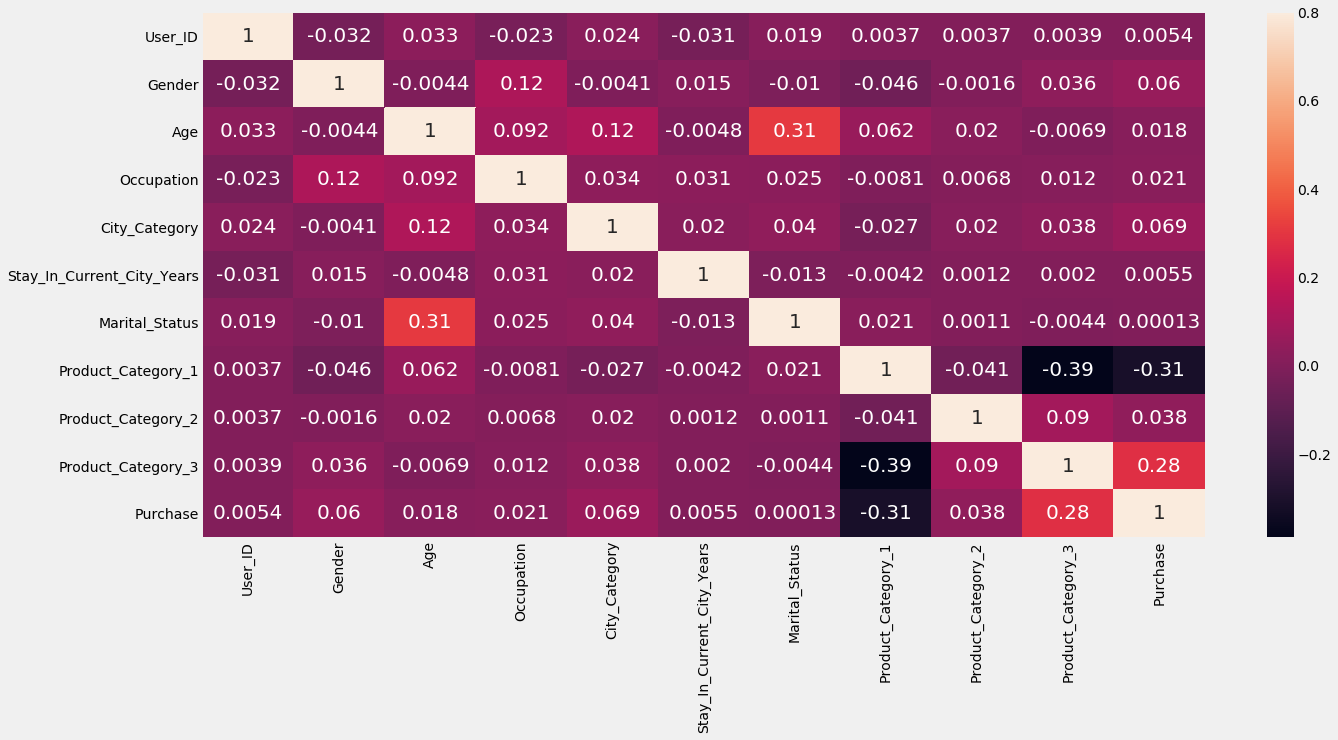

In [23]:
#correlation matrix
f, ax = plt.subplots(figsize=(20, 9))
sns.heatmap(corr, vmax=.8,annot_kws={'size': 20}, annot=True)

<p> Comme on voit si dessus, aucune variable n'est fortement correlée avec notre variable cible Purchase, mais il y a quelques remarques à faire quand même:<br>
       - La variable Age est fortement corrélée avec Marital_Status comme prévu.(Plus on grandit plus qu'on suceptible à se marier.<br>
       - Les variables User_ID et Product_ID sont completement independantes de Purchase donc on peut les supprimer.
    </p>

In [24]:
#Correlations entre les attributs

s = corr.unstack()
s

User_ID             User_ID                       1.000000
                    Gender                       -0.031898
                    Age                           0.033359
                    Occupation                   -0.023024
                    City_Category                 0.024107
                    Stay_In_Current_City_Years   -0.030655
                    Marital_Status                0.018732
                    Product_Category_1            0.003687
                    Product_Category_2            0.003663
                    Product_Category_3            0.003938
                    Purchase                      0.005389
Gender              User_ID                      -0.031898
                    Gender                        1.000000
                    Age                          -0.004413
                    Occupation                    0.117294
                    City_Category                -0.004129
                    Stay_In_Current_City_Years    0.0153

In [25]:
data = data.drop(columns="User_ID")
data = data.drop(columns="Product_ID")

In [26]:
data.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,0,0,10,0,2,0,3,0.0,0.0,8370
1,0,0,10,0,2,0,1,6.0,14.0,15200
2,0,0,10,0,2,0,12,0.0,0.0,1422
3,0,0,10,0,2,0,12,14.0,0.0,1057
4,1,6,16,2,4,0,8,0.0,0.0,7969


In [27]:
data.to_csv("Final_data.csv",index=False)#On exporte notre nouvelle dataset

In [28]:
data = pd.read_csv("Final_data.csv")

<h2>Séparation des données de test et de entrainement</h2>

In [29]:
row_count = data.shape[0]
train = data[0:int(row_count*0.7)]
test = data[int(row_count*0.7):]

In [30]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 376303 entries, 0 to 376302
Data columns (total 10 columns):
Gender                        376303 non-null int64
Age                           376303 non-null int64
Occupation                    376303 non-null int64
City_Category                 376303 non-null int64
Stay_In_Current_City_Years    376303 non-null int64
Marital_Status                376303 non-null int64
Product_Category_1            376303 non-null int64
Product_Category_2            376303 non-null float64
Product_Category_3            376303 non-null float64
Purchase                      376303 non-null int64
dtypes: float64(2), int64(8)
memory usage: 28.7 MB


<h1> Modélisation</h1>

<h2> 1.Regression Linéaire</h2>

<p> Avant de commencer à creer notre model, il faut d'abord extraire l'ensembe des variables prédictives et les mettre dans un seul dataframe et notre variable cible dans un autre.</p>

In [31]:
x = train[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]
y = train['Purchase']
x_test = test[['Gender','Age','Occupation','City_Category','Stay_In_Current_City_Years','Marital_Status','Product_Category_1','Product_Category_2','Product_Category_3']]
y_test = test['Purchase']

<h3> 1.1 Creation du model de regression </h3>

In [32]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(x, y) #creation de notre model

r_sq = model.score(x, y) #Obtention de la precision de notre model

print('coefficient de précision :', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)


coefficient de précision : 0.1353287791145934
intercept: 9357.557522009613
slope: [ 473.11622974  104.70689016    5.76732515  342.65898263    5.46530743
  -35.16006266 -317.88237617    9.22780783  148.02964685]


<p> là qu'on a créé notre model à partir des données d'entrainement, on va faire la meme chose sur les données de test.</p>

In [33]:
model = LinearRegression().fit(x_test, y_test)

r_sq = model.score(x_test, y_test)

print('coefficient de précision :', r_sq)

print('intercept:', model.intercept_)

print('slope:', model.coef_)


coefficient de précision : 0.13538107105393504
intercept: 9390.86432899005
slope: [ 509.31823364  103.39721407    6.06144443  321.27605371   16.36510636
  -79.37417525 -317.71253224    5.87397043  149.41171665]


<h2> 1.2 Prédiction </h2>

<p>Pour une cliente agée entre 46 et 50 ans,mariée et qui habite dans une petite ville depuis 3 ans et qui travail dans le secteur 10, qui a déjà acheté le produit 3 de la categorie 1 et les produit 14 et 18 des categories 2 et 3. Voici le montant qu'elle va depensé dans le prochain Black Friday suivant notre modèle</p>

In [34]:
x3 = [[0,4,10,2,3,1,3,14.0,8.0]]
y_pred = model.predict(x3)
y_pred
test_pred = model.predict(x_test)
test_pred

array([8160.24954883, 9690.07250572, 9113.38714555, ..., 8512.68382805,
       9377.71186831, 9424.70363175])

In [35]:
test.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1,3,16,2,1,0,1,2.0,0.0,11664
537573,1,3,16,2,1,0,1,15.0,16.0,19196
537574,1,3,16,2,1,0,8,15.0,0.0,8043
537575,1,3,16,2,1,0,5,0.0,0.0,7172
537576,1,3,16,2,1,0,5,8.0,0.0,6875


<p> Comme on voit notre model n'est que presque 13% précis, ce qui nous pousse evidement à chercher un different modèle qui explique notre variable cible avec plus de précision. </p>

<h2> 2. Arbre de décision </h2>

In [36]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state = 0)

regressor.fit(x, y)

scorex = regressor.score(x,y)


scorex


0.8045607533225618

In [37]:
regressor.fit(x_test,y_test)

score_t=regressor.score(x_test,y_test)

score_t

0.8504520963093657

<p> Comme on voit, ce modèle explique notre variable cible avec une precision de 85% ce qui beaucoup mieux que l'algorthme precedent</p>

In [38]:
y2_pred = regressor.predict(x3) 
y2_pred

array([10855.])

In [39]:
y3_pred = regressor.predict(x_test)
y3_pred

array([ 6355.6       , 11298.6       ,  6016.05882353, ...,
        8043.        ,  6144.88888889,  5680.25      ])

In [40]:
test.tail()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
537572,1,3,16,2,1,0,1,2.0,0.0,11664
537573,1,3,16,2,1,0,1,15.0,16.0,19196
537574,1,3,16,2,1,0,8,15.0,0.0,8043
537575,1,3,16,2,1,0,5,0.0,0.0,7172
537576,1,3,16,2,1,0,5,8.0,0.0,6875
